In [1]:
import pandas as pd
from joblib import load
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
import py7zr
from sklearn.metrics.cluster import adjusted_rand_score

In [2]:
with py7zr.SevenZipFile('../../../../data/telecom_churn_me/original_train.7z', mode='r') as z:
    z.extractall(path='original_train/')
with py7zr.SevenZipFile('../../../../data/telecom_churn_me/test/x_test.7z', mode='r') as z:
    z.extractall(path='x_test/')
with py7zr.SevenZipFile('../../../../data/telecom_churn_me/test/y_test.7z', mode='r') as z:
    z.extractall(path='y_test/')

In [3]:
target = 'TARGET'

In [4]:
train = pd.read_csv('./original_train/original_train.csv')

x_test = pd.read_csv('./x_test/x_test.csv')
y_test = pd.read_csv('./y_test/y_test.csv')

x_train = train.drop([target], axis=1)
y_train = pd.DataFrame(train[target])

In [5]:
x_test.dtypes

PARTY_NATIONALITY            float64
BILL_AMOUNT                  float64
PAYMENT_TRANSACTIONS         float64
PARTY_REV                    float64
PREPAID_LINES                float64
OTHER_LINES                  float64
STATUS                       float64
MOUS_TO_LOCAL_MOBILES        float64
MOUS_FROM_LOCAL_MOBILES      float64
MOUS_TO_LOCAL_LANDLINES      float64
MOUS_FROM_LOCAL_LANDLINES    float64
MOUS_TO_INT_NUMBER           float64
MOUS_FROM_INT_NUMBER         float64
DATA_IN_BNDL                 float64
Years_stayed                 float64
dtype: object

In [6]:
model = load('../../joblibs/telecom_churn_me/model/classification-model-smote.joblib')
model

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator LabelBinarizer from version 1.1.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator MLPClassifier from version 1.1.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(50, 50), max_iter=100,
              random_state=1)

In [7]:
y_pred_prob = model.predict_proba(x_test)
y_pred = model.predict(x_test)
y_pred

array([0., 0., 0., ..., 1., 0., 1.])

In [8]:
%pip install plotly
import plotly.express as px

Note: you may need to restart the kernel to use updated packages.


In [9]:
x_ones = x_train
x_ones[target] = y_train
x_ones = x_ones.loc[x_ones[target] == 1.0]
x_ones = x_ones.drop([target], axis=1)
#PREPAID_LINES
x_ones

,PARTY_NATIONALITY,BILL_AMOUNT,PAYMENT_TRANSACTIONS,PARTY_REV,PREPAID_LINES,OTHER_LINES,STATUS,MOUS_TO_LOCAL_MOBILES,MOUS_FROM_LOCAL_MOBILES,MOUS_TO_LOCAL_LANDLINES,MOUS_FROM_LOCAL_LANDLINES,MOUS_TO_INT_NUMBER,MOUS_FROM_INT_NUMBER,DATA_IN_BNDL,Years_stayed
20,-0.557334,0.837551,-0.474652,-0.057025,-0.372874,-0.114327,1.868853,-0.013544,-0.003320,0.231725,-0.263387,-0.446350,-0.192129,0.464650,-0.911906
34,2.044388,-0.562857,2.261594,-0.094471,0.148701,-0.114327,-0.220822,-0.297483,-0.381333,-0.064715,-0.283676,0.395377,-0.192129,-0.176878,-0.584267
56,-0.557334,-0.435923,-0.474652,-0.041069,-0.199016,0.012830,-0.220822,-0.132948,-0.432914,-0.172299,-0.301507,-0.446350,-0.192129,0.241001,-0.748087
98,-0.213711,-0.599559,-0.474652,-0.044413,0.322559,0.012830,-0.220822,0.149383,0.379659,-0.336268,-0.152862,-0.438573,-0.192129,-0.239810,-0.748087
114,-0.410067,-0.967882,-0.474652,-0.073431,-0.372874,0.012830,-0.220822,-0.430009,-0.432914,-0.445148,-0.301507,-0.446350,-0.192129,-0.312506,2.692123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798255,-0.557334,-0.468020,-0.474652,-0.022936,-0.199016,0.012830,-0.220822,-0.402918,-0.426826,-0.329009,-0.236100,-0.446350,-0.192129,-0.161849,-0.748087
798353,-0.557334,-0.131247,-0.474652,-0.088198,0.148701,-0.114327,-0.220822,-0.410959,-0.430573,-0.445148,-0.301507,-0.446350,-0.192129,0.135443,-0.748087
798367,2.044388,-0.770664,-0.474652,-0.098628,-0.199016,-0.114327,-0.220822,-0.335937,-0.278605,-0.362969,-0.177983,0.414861,-0.095231,-0.308725,-0.584267
798379,2.044388,-0.939709,0.893471,-0.078278,0.322559,0.012830,-0.220822,-0.424696,0.431793,-0.445148,1.554686,-0.212447,-0.192129,-0.254356,-0.911906


In [10]:
y_train = y_train.loc[y_train[target] == 1.0]
y_train

,TARGET
20,1.0
34,1.0
56,1.0
98,1.0
114,1.0
...,...
798255,1.0
798353,1.0
798367,1.0
798379,1.0


In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
import numpy as np
scaler = MinMaxScaler()
scaler.fit(x_ones)
X=scaler.transform(x_ones)
inertia = []
for i in range(1,8):
    kmeans = KMeans(
        n_clusters=i, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
fig = go.Figure(data=go.Scatter(x=np.arange(1,8),y=inertia))
fig.update_layout(title="Inertia vs Cluster Number",xaxis=dict(range=[0,8],title="Cluster Number"),
                  yaxis={'title':'Inertia'},
                 annotations=[
    ])

In [12]:
'''from sklearn.cluster import DBSCAN
model = DBSCAN(eps=3, min_samples=7)
yhat = model.fit_predict(x_ones)
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
plt.show()'''

'from sklearn.cluster import DBSCAN\nmodel = DBSCAN(eps=3, min_samples=7)\nyhat = model.fit_predict(x_ones)\nclusters = unique(yhat)\n# create scatter plot for samples from each cluster\nfor cluster in clusters:\n\t# get row indexes for samples with this cluster\n\trow_ix = where(yhat == cluster)\n\t# create scatter of these samples\n\tplt.scatter(X[row_ix, 0], X[row_ix, 1])\n# show the plot\nplt.show()'

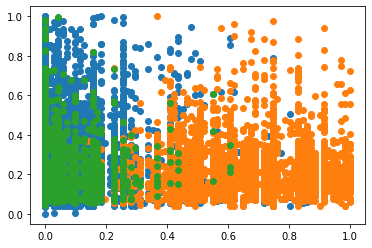

In [13]:
from sklearn.cluster import Birch
model = Birch(threshold=0.01, n_clusters=3)
# fit the model
model.fit(x_ones)
# assign a cluster to each example
yhat = model.predict(x_ones)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
plt.show()

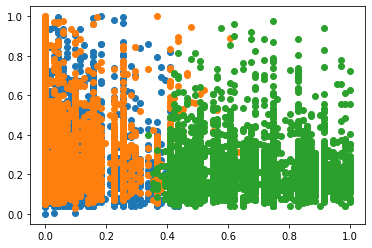

In [14]:
model = KMeans(n_clusters=3)
# fit the model
model.fit(x_ones)
# assign a cluster to each example
yhat = model.predict(x_ones)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
plt.show()

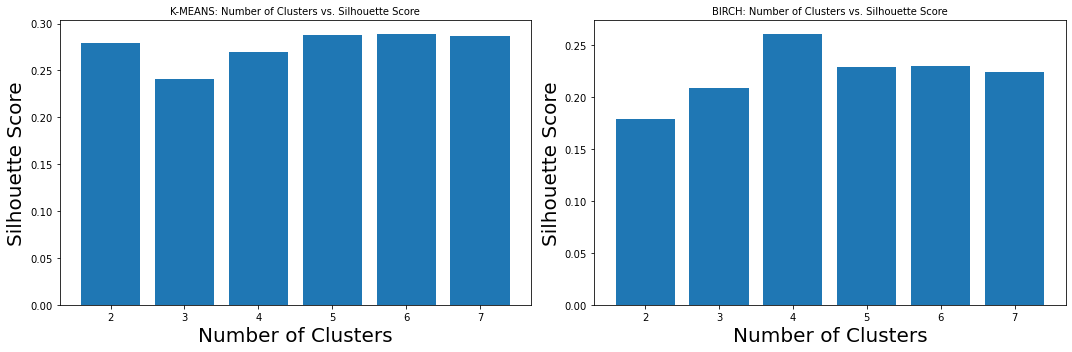

In [15]:
from sklearn.metrics import silhouette_score
figure = plt.figure(figsize=(15, 5))
kmean_sil = figure.add_subplot(1,2,1) #kmean silhouette bar chart
birch_sil = figure.add_subplot(1,2,2) #birch chart

kmean_silhouette_scores = [] 
birch_silhouette_scores = [] 

for n_cluster in range(2, 8):
    kmean_silhouette_scores.append( 
        silhouette_score(x_ones, KMeans(n_clusters = n_cluster).fit_predict(x_ones))) 
    
    birch_silhouette_scores.append( 
        silhouette_score(x_ones, Birch(n_clusters = n_cluster).fit_predict(x_ones))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
kmean_sil.bar(k, kmean_silhouette_scores) 
kmean_sil.set_title('K-MEANS: Number of Clusters vs. Silhouette Score', fontsize = 10)
kmean_sil.set_xlabel('Number of Clusters', fontsize = 20) 
kmean_sil.set_ylabel('Silhouette Score', fontsize = 20) 

birch_sil.bar(k, birch_silhouette_scores) 
birch_sil.set_title('BIRCH: Number of Clusters vs. Silhouette Score', fontsize = 10)
birch_sil.set_xlabel('Number of Clusters', fontsize = 20) 
birch_sil.set_ylabel('Silhouette Score', fontsize = 20) 
  
figure.tight_layout()

In [16]:
#Only ones
kmeans = KMeans(
        n_clusters=3, 
        init="k-means++",
        n_init=10,
        tol=1e-04, 
        random_state=42
    )
kmeans.fit(x_ones)
clusters=pd.DataFrame(x_ones)
clusters['label']=kmeans.labels_
polar=clusters.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])
fig4 = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=800,width=1400)
fig4.show()

/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [17]:
pie=clusters.groupby('label').size().reset_index()
pie.columns=['label','value']
px.pie(pie,values='value',names='label')